# Veriyi okuma ve anlama

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.linear_model import LinearRegression
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
# import data
df = pd.read_csv("/Users/erdemsmac/Desktop/autoscout24.csv",sep = ",")
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erdemsmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


# Veriyi inceleme

In [2]:
df.shape

(46405, 9)

In [3]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [4]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

# Keşfedici Veri Analizi

/Users/erdemsmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


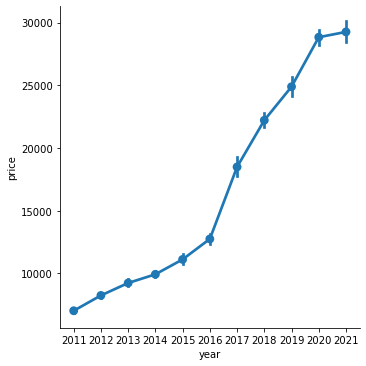

In [5]:
sns.factorplot(x='year',y='price', data = df)

<AxesSubplot:xlabel='hp', ylabel='price'>

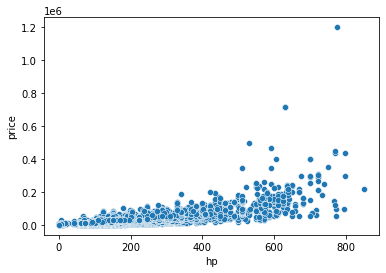

In [6]:
sns.scatterplot(x='hp',y='price', data = df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


# Veri Temizleme

In [8]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [9]:
100 * df.isnull().sum() / len(df)

mileage      0.000000
make         0.000000
model        0.308156
fuel         0.000000
gear         0.392199
offerType    0.000000
price        0.000000
hp           0.062493
year         0.000000
dtype: float64

In [10]:
df['model'] = df['model'].fillna('None')
df['gear'] = df['gear'].fillna('None')
100 * df.isnull().sum() / len(df)

mileage      0.000000
make         0.000000
model        0.000000
fuel         0.000000
gear         0.000000
offerType    0.000000
price        0.000000
hp           0.062493
year         0.000000
dtype: float64

In [11]:
df['hp'] = df['hp'].fillna(132)
100 * df.isnull().sum() / len(df)

mileage      0.0
make         0.0
model        0.0
fuel         0.0
gear         0.0
offerType    0.0
price        0.0
hp           0.0
year         0.0
dtype: float64

# -------------------------------------------------------------------------------------------

# Wordcloud

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
df.make.head()

0           BMW
1    Volkswagen
2          SEAT
3       Renault
4       Peugeot
Name: make, dtype: object

In [14]:
text = " ".join(review for review in df.make.astype(str))
print ("There are {} words in the combination of all cells in column MAKE.".format(len(text)))

There are 328937 words in the combination of all cells in column MAKE.


In [15]:
mask = np.array(Image.open("/Users/erdemsmac/Desktop/car.jpg"))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

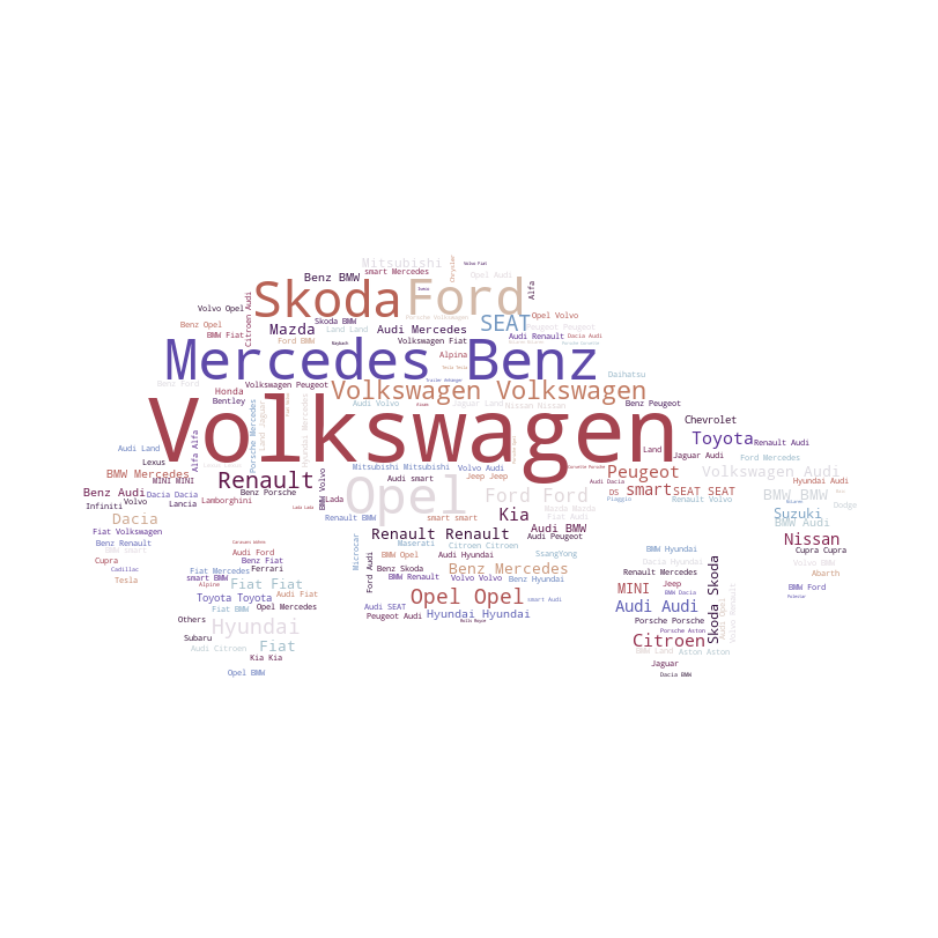

In [16]:
wordcloud = WordCloud(width = 1000, 
                      height = 1000, 
                      max_font_size = 300, 
                      background_color="white",
                      mask=mask,
                      colormap = "twilight_shifted").generate(text)

plt.figure(figsize = (20,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# 2.El piyasasındaki en çok ilan verilen markaları yukarıda Wordcloud yöntemi ile resim haline getirdim

# --------------------------------------------------------------------------------------

## Linear modeli oluşturma ve belirli özelliklere göre araba fiyat tahmini yapma

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
df1 = df.drop(['mileage','model','make','gear','fuel','offerType'],axis=1)


In [19]:
df1

,price,hp,year
0,6800,116.0,2011
1,6877,122.0,2011
2,6900,160.0,2011
3,6950,110.0,2011
4,6950,156.0,2011
...,...,...,...
46400,12990,71.0,2021
46401,12990,71.0,2021
46402,12990,71.0,2021
46403,12990,71.0,2021


In [20]:
x = df1.iloc[:,[1,2]].values
y = df1.price.values.reshape(-1,1)

# Modelimizi fit etme 

In [21]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

LinearRegression()

In [22]:
print("b0: ", multiple_linear_regression.intercept_)
print("b1,b2: ",multiple_linear_regression.coef_)

b0:  [-3568784.33105422]
b1,b2:  [[ 178.97094897 1766.63312302]]


# Fiyat tahmini ( Predict : ['HorsePower', 'Year'] )

In [23]:
FirstGuess=multiple_linear_regression.predict([[159,2014]])
print("Belirlenen özelliklere göre Araba fiyatı : {}".format(FirstGuess))

Belirlenen özelliklere göre Araba fiyatı : [[17671.15960388]]


In [24]:
SecondGuess=multiple_linear_regression.predict([[90,2012]])
print("Belirlenen özelliklere göre Araba fiyatı : {}".format(SecondGuess))

Belirlenen özelliklere göre Araba fiyatı : [[1788.89787901]]


# Word2Vec ile Özellik ve Fiyata göre Araba markası tahmin etme

In [25]:
import re

In [26]:
X = df.loc[:,'model':'price'].values.tolist() 
y = df.loc[:,'make'].values.tolist()

# Verileri Düzeltme

In [27]:
documents = []

lemmatizer = WordNetLemmatizer()

for item in range(0, len(X)):
    document = re.sub(r'\W', ' ', str(X[item]))
 
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
 
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    document = re.sub(r'^b\s+', '', document)

    document = document.lower()

    document = document.split()

    document = [lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

# Vektörleri fit etme ve modeli oluşturma

In [28]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
classifier = SGDClassifier()
classifier.fit(X_train, y_train)

SGDClassifier()

In [31]:
df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [34]:
#Datayı Predict etme
#Aşağıdaki örnekler gibi deneyebilirsiniz; 
# Make    Model  Year  Engine Fuel Type    Engine HP     gear   
# BMW     316    2009     diesel              116        Manual              

prediction = "I want a with  116 hp  Manual gear"
prediction = vectorizer.transform([prediction]).toarray()
prediction = tfidfconverter.transform(prediction).toarray()
result = classifier.predict(prediction)[0]

print("Sizin için en uygun Araba markası : {}".format(result))

Sizin için en uygun Araba markası : BMW
